In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

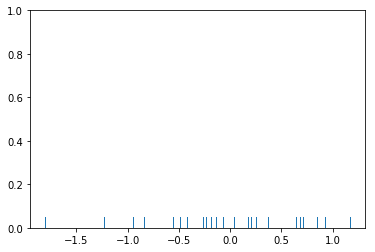

In [3]:
sns.rugplot(dataset)

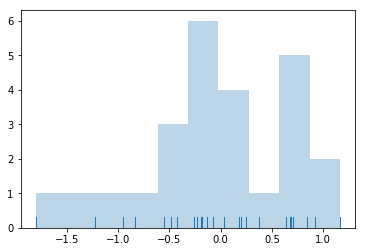

In [4]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

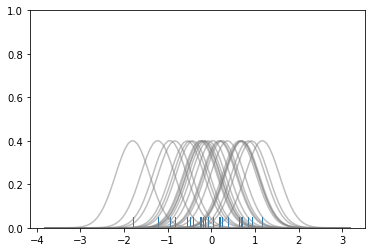

In [8]:
sns.rugplot(dataset)

# X軸を設定
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color='gray', alpha=0.5)
plt.ylim(0, 1)

Text(0.5,0.98,'Sum of the Basic Function')

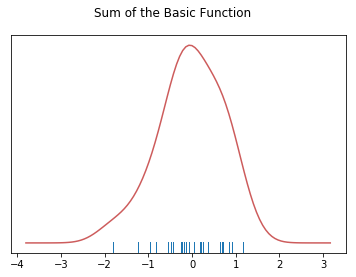

In [10]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basic Function')

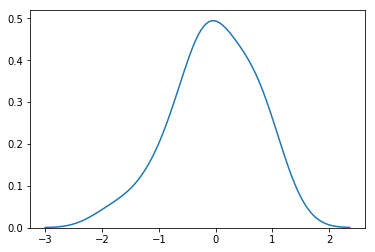

In [11]:
# 上記と同じ
sns.kdeplot(dataset)

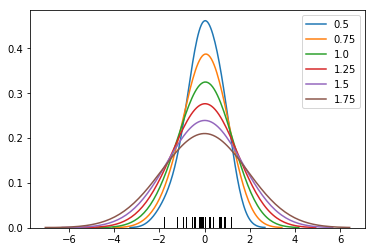

In [13]:
sns.rugplot(dataset, color='black')
# バンド幅を変える
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, label=bw)

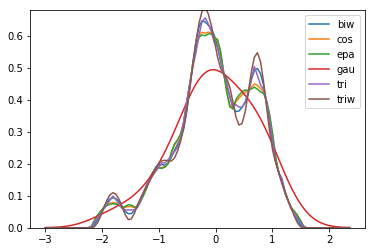

In [14]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

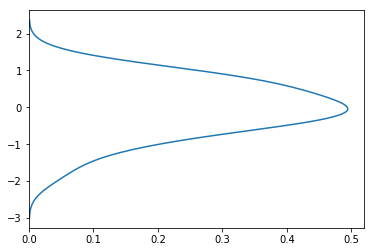

In [15]:
# 軸を入れ替える
sns.kdeplot(dataset, vertical=True)

(array([  1.,   2.,   3.,   4.,   7.,  13.,  17.,  18.,  23.,  25.]),
 array([-1.80436217, -1.50727826, -1.21019436, -0.91311045, -0.61602654,
        -0.31894264, -0.02185873,  0.27522518,  0.57230909,  0.86939299,
         1.1664769 ]),
 <a list of 10 Patch objects>)

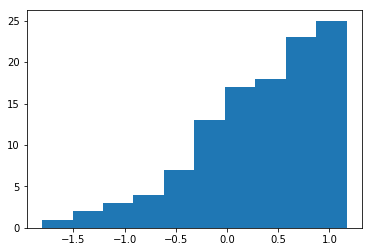

In [16]:
# 累積分布関数
plt.hist(dataset, cumulative=True)

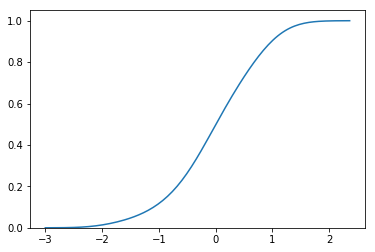

In [17]:
sns.kdeplot(dataset, cumulative=True)

In [18]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

/Users/akihiro/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


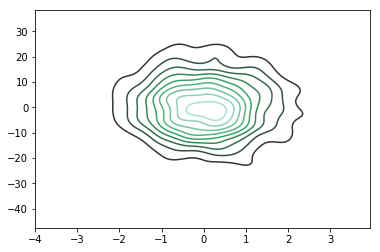

In [19]:
df = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(df)

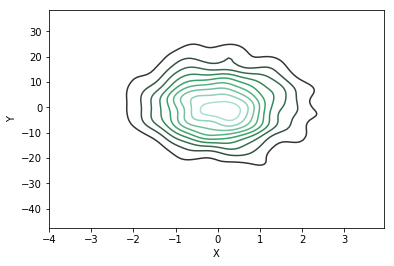

In [20]:
sns.kdeplot(df.X, df.Y)

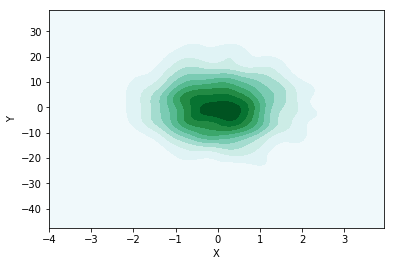

In [21]:
sns.kdeplot(df.X, df.Y, shade=True)

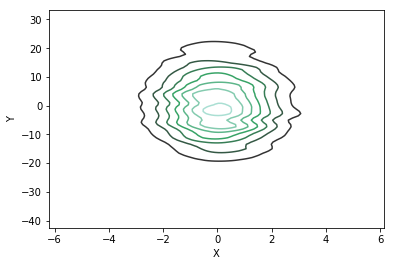

In [23]:
sns.kdeplot(df.X, df.Y, bw=1)

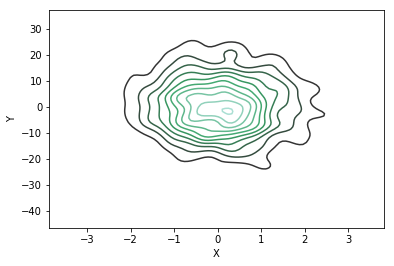

In [25]:
sns.kdeplot(df.X, df.Y, bw='silverman')

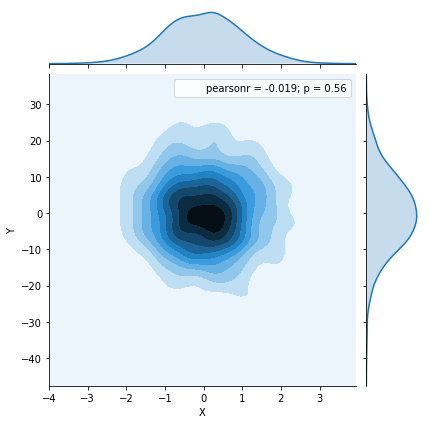

In [26]:
sns.jointplot('X', 'Y', df, kind='kde')